In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_excel("../data/online_retail.xlsx")

In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
data.drop(["InvoiceNo"], axis=1, inplace=True)

In [7]:
data.drop(["InvoiceDate"], axis=1, inplace=True)

In [8]:
data["StockCode"].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      shape=(4070,), dtype=object)

In [9]:
data

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France


In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
data["StockCode"] = data["StockCode"].astype(str)

In [14]:
le.fit(data["StockCode"])

LabelEncoder()

In [15]:
data["StockCode"] = le.transform(data["StockCode"])

In [16]:
data["StockCode"]

0         3536
1         2794
2         3044
3         2985
4         2984
          ... 
541904    1527
541905    1803
541906    2145
541907    2146
541908    1093
Name: StockCode, Length: 541909, dtype: int64

In [17]:
le.fit(data["Quantity"])

LabelEncoder()

In [18]:
data["Quantity"] = le.transform(data["Quantity"])

In [17]:
data

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,3536,WHITE HANGING HEART T-LIGHT HOLDER,334,2.55,17850.0,United Kingdom
1,2794,WHITE METAL LANTERN,334,3.39,17850.0,United Kingdom
2,3044,CREAM CUPID HEARTS COAT HANGER,336,2.75,17850.0,United Kingdom
3,2985,KNITTED UNION FLAG HOT WATER BOTTLE,334,3.39,17850.0,United Kingdom
4,2984,RED WOOLLY HOTTIE WHITE HEART.,334,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,1527,PACK OF 20 SPACEBOY NAPKINS,340,0.85,12680.0,France
541905,1803,CHILDREN'S APRON DOLLY GIRL,334,2.10,12680.0,France
541906,2145,CHILDRENS CUTLERY DOLLY GIRL,332,4.15,12680.0,France
541907,2146,CHILDRENS CUTLERY CIRCUS PARADE,332,4.15,12680.0,France


In [19]:
data.drop(["Description"], axis=1, inplace=True)

In [19]:
data

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,3536,334,2.55,17850.0,United Kingdom
1,2794,334,3.39,17850.0,United Kingdom
2,3044,336,2.75,17850.0,United Kingdom
3,2985,334,3.39,17850.0,United Kingdom
4,2984,334,3.39,17850.0,United Kingdom
...,...,...,...,...,...
541904,1527,340,0.85,12680.0,France
541905,1803,334,2.10,12680.0,France
541906,2145,332,4.15,12680.0,France
541907,2146,332,4.15,12680.0,France


In [20]:
le.fit(data["Country"])

LabelEncoder()

In [21]:
data["Country"] = le.transform(data["Country"])

In [22]:
data

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,3536,334,2.55,17850.0,36
1,2794,334,3.39,17850.0,36
2,3044,336,2.75,17850.0,36
3,2985,334,3.39,17850.0,36
4,2984,334,3.39,17850.0,36
...,...,...,...,...,...
541904,1527,340,0.85,12680.0,13
541905,1803,334,2.10,12680.0,13
541906,2145,332,4.15,12680.0,13
541907,2146,332,4.15,12680.0,13


In [22]:
from sklearn.cluster import KMeans

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
data.dropna(axis=0, inplace=True)

In [26]:
data

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,3536,334,2.55,17850.0,36
1,2794,334,3.39,17850.0,36
2,3044,336,2.75,17850.0,36
3,2985,334,3.39,17850.0,36
4,2984,334,3.39,17850.0,36
...,...,...,...,...,...
541904,1527,340,0.85,12680.0,13
541905,1803,334,2.10,12680.0,13
541906,2145,332,4.15,12680.0,13
541907,2146,332,4.15,12680.0,13


In [25]:
subset_data = data.sample(30000)

In [26]:
from tqdm import tqdm

In [27]:

sil_vals = []

for k in tqdm(range(2, 10+1)):
    km = KMeans(k)
    km.fit(subset_data)
    labels = km.predict(subset_data)

    sil_vals.append(silhouette_score(subset_data, labels))

100%|██████████| 9/9 [01:14<00:00,  8.23s/it]


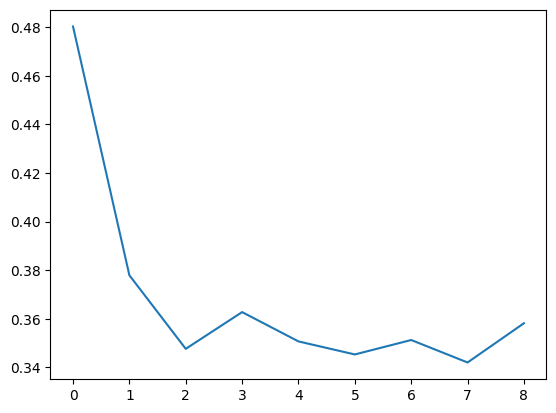

In [29]:
plt.plot(sil_vals)

## Optimal number of clusters: 4

In [30]:
km = KMeans(4)

In [31]:
km.fit(subset_data)

KMeans(n_clusters=4)

In [32]:
labels = km.predict(subset_data)

In [33]:
labels

array([1, 3, 1, ..., 1, 3, 3], shape=(30000,), dtype=int32)

(array([5214.,    0.,    0., 7666.,    0.,    0., 7265.,    0.,    0.,
        9855.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

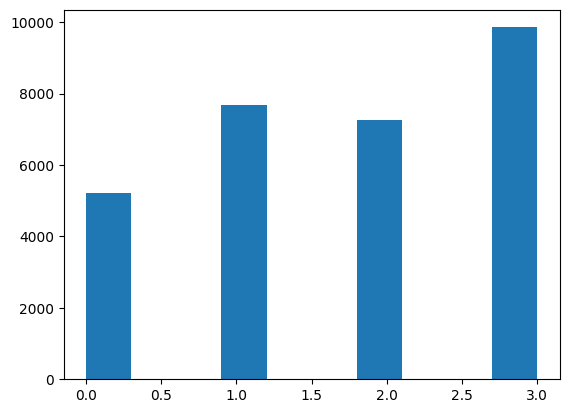

In [34]:
plt.hist(labels)

In [35]:
subset_data

,StockCode,Quantity,UnitPrice,CustomerID,Country
383232,1381,334,2.95,13359.0,36
286404,1583,331,1.65,16984.0,36
101208,1706,330,8.50,12945.0,36
224803,1540,329,8.50,14606.0,36
149972,942,338,1.95,12705.0,14
...,...,...,...,...,...
193270,3128,336,0.42,15005.0,36
98290,1161,330,2.10,17841.0,36
313221,455,352,0.55,12610.0,19
350061,2150,340,1.25,17164.0,36


In [36]:
subset_data["y"] = labels

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train, test = train_test_split(subset_data)

In [39]:
trainX = train.drop(["y"], axis=1)
trainY = train["y"]

testX = test.drop(["y"], axis=1)
testY = test["y"]

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
clf1 = KNeighborsClassifier()

In [42]:
clf1.fit(trainX, trainY)

KNeighborsClassifier()

In [43]:
(clf1.predict(trainX) == trainY).mean()

np.float64(0.9975555555555555)

In [44]:
(clf1.predict(testX) == testY).mean()

np.float64(0.9944)

In [45]:
import pickle

In [47]:
pickle.dump(clf1, open("../models/customer_segmentation_k_neighbours.pkl", "wb"))

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf2 = DecisionTreeClassifier()

In [50]:
clf2.fit(trainX, trainY)

DecisionTreeClassifier()

In [51]:
(clf2.predict(trainX) == trainY).mean()

np.float64(1.0)

In [54]:
(clf2.predict(testX) == testY).mean()

np.float64(0.9942666666666666)

In [56]:
pickle.dump(clf2, open("../models/customer_segmentation_decision_tree.pkl", "wb"))

In [58]:
from sklearn.svm import SVC

In [59]:
clf3 = SVC()

In [60]:
clf3.fit(trainX, trainY)

SVC()

In [61]:
(clf3.predict(trainX) == trainY).mean()

np.float64(0.9893333333333333)

In [62]:
(clf3.predict(testX) == testY).mean()

np.float64(0.9882666666666666)

In [64]:
pickle.dump(clf3, open("../models/customer_segmentation_svc.pkl", "wb"))